In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
from sklearn.model_selection import train_test_split
import sklearn.metrics as metrics
from sklearn.preprocessing import PolynomialFeatures 
from sklearn.linear_model import LinearRegression

In [2]:
forest_data = pd.read_csv('C:\Users\aneri\Downloads\forest+fires.csv')

In [3]:
forest_data.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0


In [4]:
forest_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X       517 non-null    int64  
 1   Y       517 non-null    int64  
 2   month   517 non-null    object 
 3   day     517 non-null    object 
 4   FFMC    517 non-null    float64
 5   DMC     517 non-null    float64
 6   DC      517 non-null    float64
 7   ISI     517 non-null    float64
 8   temp    517 non-null    float64
 9   RH      517 non-null    int64  
 10  wind    517 non-null    float64
 11  rain    517 non-null    float64
 12  area    517 non-null    float64
dtypes: float64(8), int64(3), object(2)
memory usage: 52.6+ KB


In [5]:
forest_data.describe()

,X,Y,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
count,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000
mean,4.669246,4.299807,90.644681,110.872340,547.940039,9.021663,18.889168,44.288201,4.017602,0.021663,12.847292
std,2.313778,1.229900,5.520111,64.046482,248.066192,4.559477,5.806625,16.317469,1.791653,0.295959,63.655818
min,1.000000,2.000000,18.700000,1.100000,7.900000,0.000000,2.200000,15.000000,0.400000,0.000000,0.000000
25%,3.000000,4.000000,90.200000,68.600000,437.700000,6.500000,15.500000,33.000000,2.700000,0.000000,0.000000
50%,4.000000,4.000000,91.600000,108.300000,664.200000,8.400000,19.300000,42.000000,4.000000,0.000000,0.520000
75%,7.000000,5.000000,92.900000,142.400000,713.900000,10.800000,22.800000,53.000000,4.900000,0.000000,6.570000
max,9.000000,9.000000,96.200000,291.300000,860.600000,56.100000,33.300000,100.000000,9.400000,6.400000,1090.840000


In [6]:
#forest_data.drop('month',axis =1,inplace = True)
forest_data.drop('day',axis =1,inplace = True)


In [7]:
forest_data.head()

,X,Y,month,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,oct,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,oct,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,mar,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,mar,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0


In [8]:
corr_matrix = forest_data.corr()
corr_matrix["area"].sort_values(ascending=False)

/var/folders/y9/yft9b80153v2_1dbhrfddc2m0000gn/T/ipykernel_88922/3458842775.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = forest_data.corr()


area    1.000000
temp    0.097844
DMC     0.072994
X       0.063385
DC      0.049383
Y       0.044873
FFMC    0.040122
wind    0.012317
ISI     0.008258
rain   -0.007366
RH     -0.075519
Name: area, dtype: float64

In [10]:
#splitting dataset into train and test sets

train_set, test_set = train_test_split(forest_data, test_size=0.2, random_state=42)

In [18]:
train_set.drop('month',axis =1, inplace = True)

In [19]:
test_set.drop('month',axis =1, inplace = True)

In [20]:
train_label = train_set['area']
test_label = test_set['area']
train_predictor = train_set.drop('area',axis =1, inplace = False)
test_predictor = test_set.drop('area',axis =1, inplace = False )

In [21]:
train_predictor

,X,Y,FFMC,DMC,DC,ISI,temp,RH,wind,rain
329,4,3,92.2,102.3,751.5,8.4,23.5,27,4.0,0.0
173,4,4,90.9,126.5,686.5,7.0,17.7,39,2.2,0.0
272,2,5,92.1,152.6,658.2,14.3,20.2,47,4.0,0.0
497,3,4,96.1,181.1,671.2,14.3,32.3,27,2.2,0.0
182,5,4,86.8,15.6,48.3,3.9,12.4,53,2.2,0.0
...,...,...,...,...,...,...,...,...,...,...
71,4,5,94.3,85.1,692.3,15.9,17.7,37,3.6,0.0
106,4,5,91.4,30.7,74.3,7.5,18.2,29,3.1,0.0
270,2,2,92.1,152.6,658.2,14.3,21.8,56,3.1,0.0
435,2,5,90.8,84.7,376.6,5.6,23.8,51,1.8,0.0


In [22]:
train_label

329     3.33
173     3.07
272     3.09
497    14.68
182     6.38
       ...  
71      0.00
106     0.00
270     0.52
435     0.00
102     0.00
Name: area, Length: 413, dtype: float64

In [23]:
train_scaled = scaler.fit_transform(train_predictor)
test_scaled = scaler.fit_transform(test_predictor)

In [24]:
train_scaled

array([[0.375     , 0.14285714, 0.9483871 , ..., 0.14117647, 0.36470588,
        0.        ],
       [0.375     , 0.28571429, 0.9316129 , ..., 0.28235294, 0.15294118,
        0.        ],
       [0.125     , 0.42857143, 0.94709677, ..., 0.37647059, 0.36470588,
        0.        ],
       ...,
       [0.125     , 0.        , 0.94709677, ..., 0.48235294, 0.25882353,
        0.        ],
       [0.125     , 0.42857143, 0.93032258, ..., 0.42352941, 0.10588235,
        0.        ],
       [0.125     , 0.28571429, 0.98193548, ..., 0.29411765, 0.36470588,
        0.        ]])

In [25]:
test_scaled

array([[0.625     , 0.42857143, 0.3373494 , ..., 1.        , 0.5       ,
        0.        ],
       [0.75      , 0.42857143, 1.        , ..., 0.61333333, 0.5       ,
        0.57142857],
       [0.875     , 0.57142857, 0.75903614, ..., 0.13333333, 0.15555556,
        0.        ],
       ...,
       [0.5       , 0.28571429, 0.69277108, ..., 0.69333333, 0.8       ,
        1.        ],
       [0.125     , 0.28571429, 0.12650602, ..., 0.69333333, 0.6       ,
        0.        ],
       [0.625     , 0.14285714, 0.80120482, ..., 0.2       , 0.75555556,
        0.        ]])

In [47]:
# applying polynomial regression 
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
lin_reg = LinearRegression()
poly_features = PolynomialFeatures(degree=3, include_bias = False)
x_poly = poly_features.fit_transform(train_scaled)
#lin_reg.fit(x_poly,train_label)





In [27]:
from sklearn.metrics import mean_squared_error
fire_predictions = lin_reg.predict(x_poly)
lin_mse = mean_squared_error(train_label, fire_predictions) 
lin_rmse = np.sqrt(lin_mse)
lin_rmse

42.61954610861618

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.445e+05, tolerance: 8.589e+01
  model = cd_fast.enet_coordinate_descent(


Lasso(alpha=0.001)

In [29]:
fire_predictions_lasso = lasso_reg.predict(x_poly)
lasso_mse = mean_squared_error(train_label, fire_predictions_lasso) 
lasso_rmse = np.sqrt(lasso_mse)
lasso_rmse

44.29539947403232

In [30]:
from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha = 0.0000001,solver = 'sag')
ridge_reg.fit(x_poly,train_label)

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Ridge(alpha=1e-07, solver='sag')

In [31]:
fire_predictions_ridge = ridge_reg.predict(x_poly)
ridge_mse = mean_squared_error(train_label, fire_predictions_ridge) 
ridge_rmse = np.sqrt(ridge_mse)
ridge_rmse

42.651212650103496

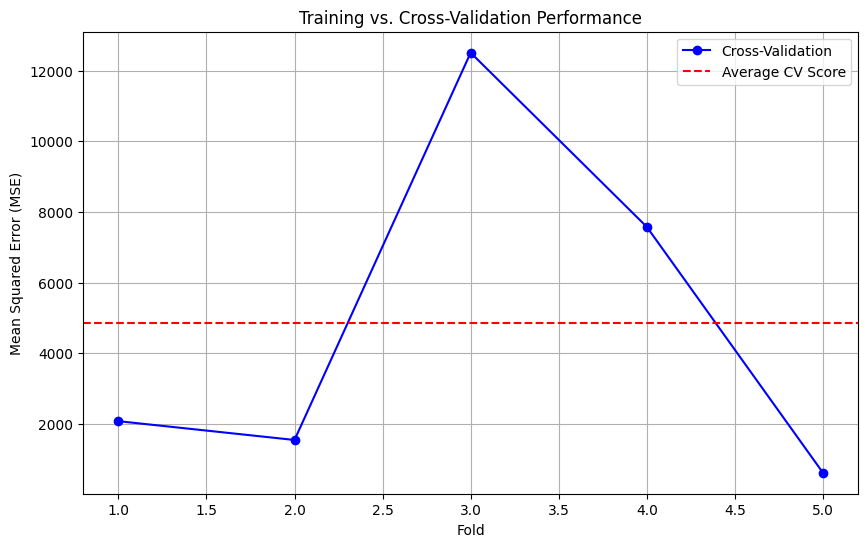

In [32]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(lin_reg, x_poly, train_label, cv=5, scoring='neg_mean_squared_error')
mse_scores = -scores  # Convert negative MSE to positive

# Fit the model on the entire training data
lin_reg.fit(x_poly, train_label)

# Plot training vs. validation performance
plt.figure(figsize=(10, 6))
plt.plot(range(1, 6), mse_scores, marker='o', linestyle='-', color='blue', label='Cross-Validation')
plt.axhline(y=np.mean(mse_scores), color='red', linestyle='--', label='Average CV Score')
plt.xlabel('Fold')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('Training vs. Cross-Validation Performance')
plt.legend()
plt.grid(True)
plt.show()

In [50]:
x_poly_test = poly_features.fit_transform(test_scaled)
fire_predictions = lin_reg.predict(x_poly_test)
lin_mse_test = mean_squared_error(test_label, fire_predictions) 
lin_rmse_test = np.sqrt(lin_mse)
lin_rmse_test

42.61954610861618

In [51]:
test_predictions_lasso = lasso_reg.predict(x_poly_test)
lasso_mse_test = mean_squared_error(test_label, test_predictions_lasso) 
lasso_rmse_test = np.sqrt(lasso_mse_test)
lasso_rmse_test

108.31515001308863

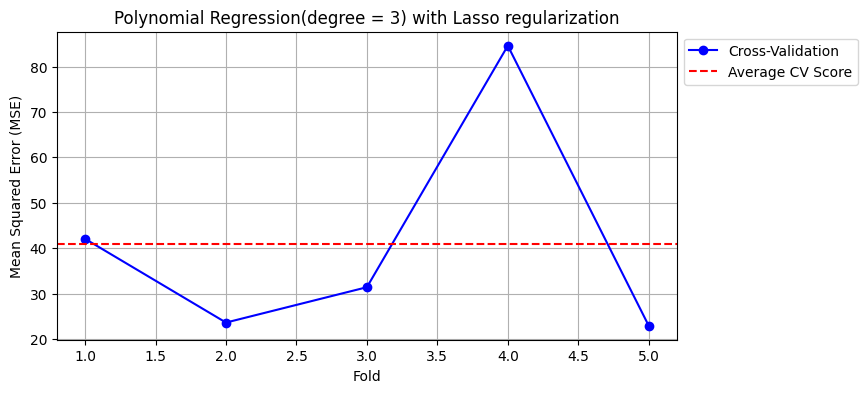

In [106]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import Lasso 
lasso_reg = Lasso(alpha = 0.1)
lasso_reg.fit(x_poly,train_label)
scores = cross_val_score(lasso_reg, x_poly, train_label, cv=5, scoring='neg_mean_squared_error')
mse_scores =np.sqrt( -scores)  # Convert negative MSE to positive

# Fit the model on the entire training data
lasso_reg.fit(x_poly, train_label)

# Plot training vs. validation performance
plt.figure(figsize=(8, 4))
plt.plot(range(1, 6), mse_scores, marker='o', linestyle='-', color='blue', label='Cross-Validation')
plt.axhline(y=np.mean(mse_scores), color='red', linestyle='--', label='Average CV Score')
plt.xlabel('Fold')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('Polynomial Regression(degree = 3) with Lasso regularization')
plt.legend()
plt.grid(True)
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

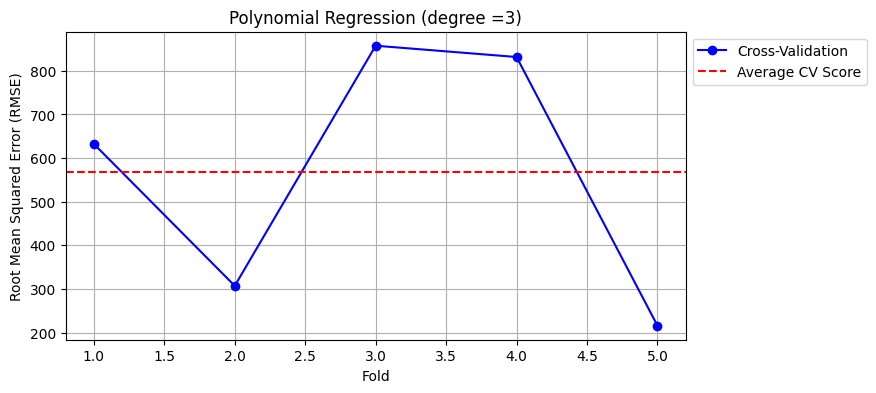

In [107]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
import numpy as np
import matplotlib.pyplot as plt

# Calculate RMSE scores using cross-validation
rmse_scores = np.sqrt(-cross_val_score(lin_reg, x_poly, train_label, cv=5, scoring='neg_mean_squared_error'))

# Fit the model on the entire training data
lin_reg.fit(x_poly, train_label)

# Plot training vs. validation performance
plt.figure(figsize=(8, 4))
plt.plot(range(1, 6), rmse_scores, marker='o', linestyle='-', color='blue', label='Cross-Validation')
plt.axhline(y=np.mean(rmse_scores), color='red', linestyle='--', label='Average CV Score')
plt.xlabel('Fold')
plt.ylabel('Root Mean Squared Error (RMSE)')
plt.title('Polynomial Regression (degree =3)')
plt.legend()
plt.grid(True)
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.show()


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.820e+05, tolerance: 7.234e+01
  model = cd_fast.enet_coordinate_descent(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.909e+05, tolerance: 8.391e+01
  model = cd_fast.enet_coordinate_descent(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iter

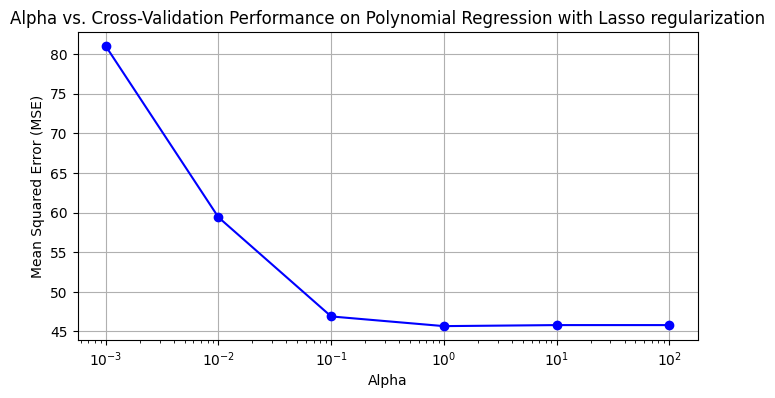

In [108]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import Lasso

# Generate a range of alpha values to test
alpha_values = [0.001, 0.01, 0.1, 1.0, 10.0,100]

# Initialize an empty list to store mean squared error scores
mse_scores = []

# Loop through alpha values and perform cross-validation
for alpha in alpha_values:
    lasso_reg = Lasso(alpha=alpha)
    scores = cross_val_score(lasso_reg, x_poly, train_label, cv=5, scoring='neg_mean_squared_error')
    mse_scores.append(np.sqrt(-scores.mean()))

# Plot alpha vs. MSE scores
plt.figure(figsize=(8, 4))
plt.plot(alpha_values, mse_scores, marker='o', linestyle='-', color='blue')
plt.xscale('log')  # Use a logarithmic scale for alpha
plt.xlabel('Alpha')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('Alpha vs. Cross-Validation Performance on Polynomial Regression with Lasso regularization')
plt.grid(True)
plt.show()


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.445e+05, tolerance: 8.589e+01
  model = cd_fast.enet_coordinate_descent(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.206e+04, tolerance: 8.589e+01
  model = cd_fast.enet_coordinate_descent(


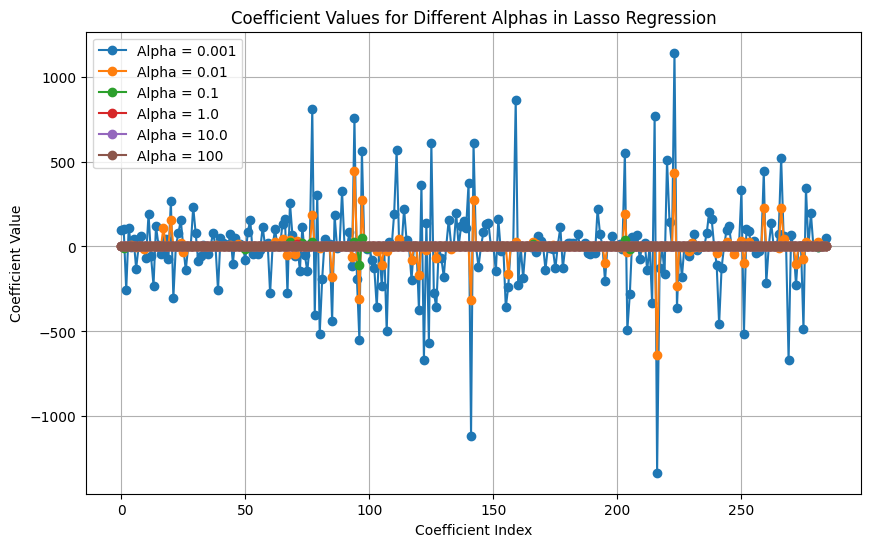

In [65]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import Lasso

# Generate a range of alpha values to test
alpha_values = [0.001, 0.01, 0.1, 1.0, 10.0, 100]

# Initialize a dictionary to store coefficient values for each alpha
coefficients_per_alpha = {}

# Loop through alpha values and fit Lasso models
for alpha in alpha_values:
    lasso_reg = Lasso(alpha=alpha)
    lasso_reg.fit(x_poly, train_label)
    coefficients_per_alpha[alpha] = lasso_reg.coef_

# Plot coefficient values for each alpha
plt.figure(figsize=(10, 6))
for alpha, coefficients in coefficients_per_alpha.items():
    plt.plot(coefficients, marker='o', linestyle='-', label=f'Alpha = {alpha}')

plt.xlabel('Coefficient Index')
plt.ylabel('Coefficient Value')
plt.title('Coefficient Values for Different Alphas in Lasso Regression')
plt.legend()
plt.grid(True)
plt.show()


In [71]:
import numpy as np
from sklearn.linear_model import Lasso

# Generate a range of alpha values to test
alpha_values = [0.001, 0.01, 0.1, 1.0, 10.0, 100]

# Loop through alpha values and fit Lasso models
for alpha in alpha_values:
    lasso_reg = Lasso(alpha=alpha)
    lasso_reg.fit(x_poly, train_label)
    coeff_shape = lasso_reg.coef_.shape
    print(f"Coefficient Matrix Dimensions for Alpha = {alpha}: {coeff_shape}")


Coefficient Matrix Dimensions for Alpha = 0.001: (285,)
Coefficient Matrix Dimensions for Alpha = 0.01: (285,)
Coefficient Matrix Dimensions for Alpha = 0.1: (285,)
Coefficient Matrix Dimensions for Alpha = 1.0: (285,)
Coefficient Matrix Dimensions for Alpha = 10.0: (285,)
Coefficient Matrix Dimensions for Alpha = 100: (285,)


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.445e+05, tolerance: 8.589e+01
  model = cd_fast.enet_coordinate_descent(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.206e+04, tolerance: 8.589e+01
  model = cd_fast.enet_coordinate_descent(


In [76]:
len(train_set)

413

In [78]:
import numpy as np
from sklearn.linear_model import Lasso

# Generate a range of alpha values to test
alpha_values = [0.001, 0.01, 0.1, 1.0, 10.0, 100]

# Initialize a dictionary to store coefficient matrices for each alpha
coeff_matrices_per_alpha = {}

# Loop through alpha values and fit Lasso models
for alpha in alpha_values:
    lasso_reg = Lasso(alpha=alpha)
    lasso_reg.fit(x_poly, train_label)
    coeff_matrix = lasso_reg.coef_
    
    # Replace negative zeros with actual zeros
    coeff_matrix[coeff_matrix == -0.0] = 0.0
    
    coeff_matrices_per_alpha[alpha] = coeff_matrix

# Set print options to suppress decimal point for zero values
np.set_printoptions(formatter={'float_kind': lambda x: "0" if x == 0 else "{:.2f}".format(x)})

# Print coefficient matrices for each alpha
for alpha, coeff_matrix in coeff_matrices_per_alpha.items():
    print(f"Coefficient Matrix for Alpha = {alpha}:\n{coeff_matrix}\n")


Coefficient Matrix for Alpha = 0.001:
[96.41 101.23 -258.84 109.58 -2.26 42.17 -130.40 0 59.20 -10.93 -65.06
 192.18 -57.40 -230.10 119.25 8.92 -46.49 -38.48 44.50 -72.86 269.15
 -303.97 0 78.78 154.53 -2.82 -138.86 0 0 232.56 78.45 -87.17 -53.81 6.42
 -18.09 -43.97 0 80.23 0 -256.14 50.48 18.99 13.87 0 72.93 -100.32 52.52
 15.08 12.58 0 -78.22 85.66 154.86 -42.47 0 -42.39 -20.10 115.00 0 22.98
 -275.39 0 101.66 0 0 134.54 160.37 -276.60 258.67 65.63 -55.96 8.21
 -142.41 113.86 -49.90 -147.27 16.98 811.47 -402.48 303.87 -513.70 -189.94
 42.37 0 12.40 -437.40 183.63 -8.24 0 325.02 3.64 0 82.33 -115.42 754.29
 -192.84 -552.87 564.04 0 -16.07 0.07 -79.96 -129.56 -357.43 0 -230.71
 -14.84 -500.45 25.40 0 192.64 565.41 25.21 0 222.07 38.97 0 -195.68 0 0
 -374.87 363.71 -665.70 136.31 -565.52 611.37 -272.16 -359.24 0 -67.92
 -177.67 1.43 157.79 4.31 0 198.45 0 121.32 152.63 106.40 373.48 -1116.59
 610.98 0 -119.92 0 84.88 131.70 140.40 0 0 -145.00 160.99 -28.89 0
 -359.08 -236.95 0 0 861.96 

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.445e+05, tolerance: 8.589e+01
  model = cd_fast.enet_coordinate_descent(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.206e+04, tolerance: 8.589e+01
  model = cd_fast.enet_coordinate_descent(


In [87]:
test_label

304     0.00
501     0.00
441     1.23
153     1.46
503     1.95
       ...  
167     2.51
275     5.38
509     2.17
513    54.29
320    34.36
Name: area, Length: 104, dtype: float64

In [91]:
y_pred_poly

array([-3436.89, -451.21, 73.73, -2.25, -364.05, 2139.44, 300.49,
       17611.89, -914.27, -352.31, -2548.01, 383.94, 590.26, -459.69,
       195.40, 3183.78, -645.13, -90.09, 279.55, -269.96, 5559.27, 69.96,
       27405.48, 447.18, -27.89, 185.54, 3383.26, -83.73, 955.27, 834.84,
       -2026.56, 1437.16, -1452.15, 117.58, 546.05, 511.43, 20.56,
       -428.98, 2965.36, -1024.37, 1479.76, -300.49, 2.10, -574.23,
       -673.72, 2039.10, 525.04, 992.42, 239.50, 112.13, 798.57, -250.45,
       -17.21, 927.85, -273.45, 924.91, 2256.86, 647.47, 117.12, -1165.89,
       -317.66, -154.05, 1127.02, -17.48, -1087.95, -170.67, 899.13,
       276.40, 544.37, 10380.10, 247.00, 313.78, -545.55, 5457.24,
       1812.56, -838.66, -992.10, -1482.51, -1609.02, 2564.76, 31043.51,
       -1129.95, -2505.85, 1531.71, 2644.91, 43195.96, -542.71, 283.30,
       26419.05, 2120.84, 1372.59, -25.82, 376.96, -3363.55, -7.92,
       727.14, 150.26, 506.92, -1310.57, -180.93, 9426.52, -1293.85,
       -9049.9

In [92]:
test_label

304     0.00
501     0.00
441     1.23
153     1.46
503     1.95
       ...  
167     2.51
275     5.38
509     2.17
513    54.29
320    34.36
Name: area, Length: 104, dtype: float64

In [93]:
y_pred_lasso

array([-12.86, -18.85, -36.47, 9.91, -5.76, 46.24, 22.17, 65.34, -10.70,
       -27.69, -34.24, 26.74, -9.78, 11.78, -17.93, 45.19, 7.01, -16.69,
       93.29, 17.28, 55.63, 11.46, 124.01, 25.48, 7.71, 32.55, 82.50,
       -14.42, -13.38, 39.30, -3.46, 14.61, 1.00, 6.90, 14.08, 93.25,
       24.23, -33.69, 53.72, 18.50, 72.73, -17.97, 7.15, -93.39, -151.48,
       156.76, -63.56, 33.11, 1.13, 73.26, 42.05, -11.57, -0.10, 0.47,
       -18.35, 21.69, 43.66, 62.32, 19.06, 8.20, -18.99, -21.02, 49.53,
       14.62, 8.93, -14.44, 14.95, -81.25, 71.30, 123.29, 23.79, 21.70,
       2.28, -22.03, 31.15, 71.02, -50.64, -28.87, -10.56, 49.36, 177.02,
       -24.60, -28.77, 8.51, 26.14, 36.57, 14.80, 12.42, 125.73, 51.94,
       103.22, 8.76, 22.94, 159.02, -5.92, 64.21, 13.94, 19.33, -118.81,
       12.26, 96.88, 13.01, -18.25, -71.16])

In [94]:
max_value = np.max(test_label)
max_value

1090.84

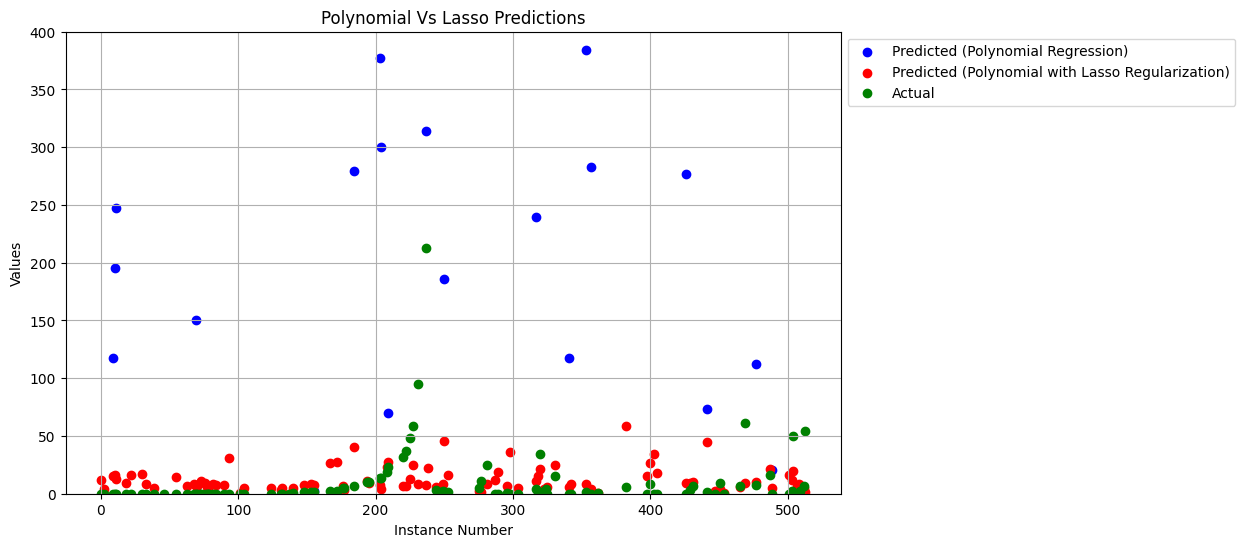

In [104]:
# Calculate polynomial features for the test set
x_poly_test = poly_features.transform(test_scaled)

# Predict target values using the trained polynomial regression model
y_pred_poly = lin_reg.predict(x_poly_test)

# Predict target values using the trained Lasso regression model
y_pred_lasso = lasso_reg.predict(x_poly_test)

# Get the instance numbers (indices) of the test dataset
instance_numbers = test_label.index

# Plot actual values, predicted values from polynomial regression, and predicted values from Lasso regression
plt.figure(figsize=(10, 6))
plt.scatter(instance_numbers, y_pred_poly, color='blue', label='Predicted (Polynomial Regression)')
plt.scatter(instance_numbers, y_pred_lasso, color='red', label='Predicted (Polynomial with Lasso Regularization)')
plt.scatter(instance_numbers, test_label, color='green', label='Actual')
plt.xlabel('Instance Number')
plt.ylabel('Values')
plt.title('Polynomial Vs Lasso Predictions')
plt.legend()
plt.ylim(0, 400)  # Set the y-axis range
plt.grid(True)
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.show()




In [114]:
import numpy as np
from sklearn.linear_model import Lasso

# Generate a range of alpha values to test
alpha_values = [1.0,0.1,0.001]

# Initialize a dictionary to store coefficient matrices for each alpha
coeff_matrices_per_alpha = {}

# Loop through alpha values and fit Lasso models
for alpha in alpha_values:
    lasso_reg = Lasso(alpha=alpha)
    lasso_reg.fit(x_poly, train_label)
    coeff_matrix = lasso_reg.coef_
    
    # Replace negative zeros with actual zeros
    coeff_matrix[coeff_matrix == -0.0] = 0.0
    
    coeff_matrices_per_alpha[alpha] = coeff_matrix

# Set print options to suppress decimal point for zero values
np.set_printoptions(formatter={'float_kind': lambda x: "0" if x == 0 else "{:.2f}".format(x)})

# Print coefficient matrices for each alpha
for alpha, coeff_matrix in coeff_matrices_per_alpha.items():
    print(f"Coefficient Matrix for Alpha = {alpha}:\n\n{coeff_matrix}\n")



Coefficient Matrix for Alpha = 1.0:

[0 0 0 2.32 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 11.74 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]

Coefficient Matrix for Alpha = 0.1:

[0 -6.66 0 0 0 0 0 1.04 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 -15.09 -1.53 0 0 0 0 0 0 0 0.50 0 0 0 0
 0 0 0 0 27.61 0 0 4.57 0 21.34 0 0 0 28.92 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 23.38 14.16 -110.31 48.48 0 -9.10 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 -0.07 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.445e+05, tolerance: 8.589e+01
  model = cd_fast.enet_coordinate_descent(
